In [76]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')

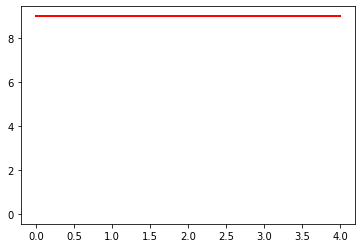

In [2]:
fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
for i in range(10):
    ax.plot([i]* 5, c='red',linewidth=2) # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation

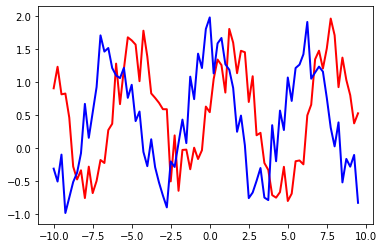

In [3]:
fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
x  =  np.arange(-10,10,0.25)
y = np.sin(x)
z  =  np.cos(x)
for i in range(len(x)):
    ax.plot(x[:i],y[:i]+ 1.002*np.random.random(size=i),color="red",linewidth=2) # 5 element array from 0 to 9
    ax.plot(x[:i],  z[:i]+1.002*np.random.random(size=i),color="blue",linewidth=2) # 5 element array from 0 to 9
    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation

# Evolution Plot

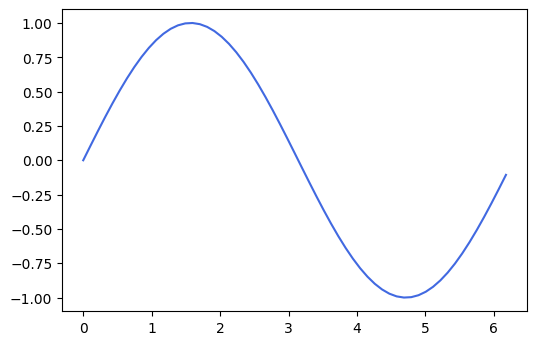

In [59]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
x = np.linspace(0, np.pi*2, 60) # a sine circle
y = np.sin(x) # sine
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = y[:i] # current sine
    ax.plot(x_t, y_t, c='royalblue')
    camera.snap()
animation = camera.animate(blit=False, interval=40)
HTML(animation.to_html5_video())

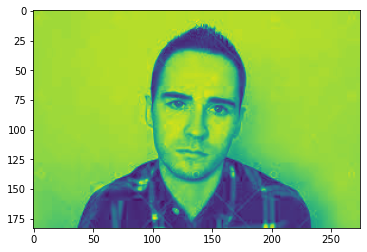

In [72]:
import os
path = './basedata/test'
basepath  =  os.getcwd()
basepath =  os.path.join(basepath,path)
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        img_obj = plt.imread(file)
        ax.imshow(img_obj[:,:,0])
        camera.snap()
animation = camera.animate(blit=False, interval=240)
HTML(animation.to_html5_video())

## Using dynamic labels and titles

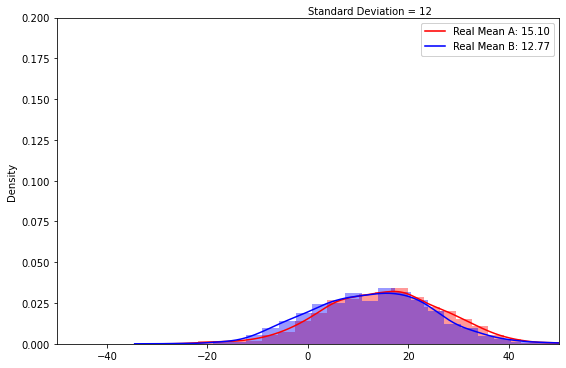

In [89]:
std = 3 # start std 
Am = 15. # mean of first normal
Bm = 12.5 # mean of second normal
fig, ax = plt.subplots(figsize=(9,6)) # empty fig
camera = Camera(fig)
for j in range(10):
    plt.ylim((0, 0.2)) # setting up the limits (or else it will auto ajust
    plt.xlim((-50, 50))
    
    A = np.random.normal(Am, std, size=(1000)) # creating the 1000-sized normals
    B = np.random.normal(Bm, std, size=(1000))    
    A_plot = sns.distplot(A, color='red') 
    B_plot = sns.distplot(B, color='blue')
    plt.legend(( 
        'Real Mean A: {:.2f}'.format(np.mean(A)),
        'Real Mean B: {:.2f}'.format(np.mean(B))
    ))
        
    ax.text(0.5, 1.01, "Standard Deviation = "+str(std), transform=ax.transAxes) # making the dynamic title
    camera.snap() # camera snapshot
    
    std += 1 # incrementing the std
anim = camera.animate() # animating the plots
HTML(anim.to_html5_video())

In [90]:
anim.save('animation_dens.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [91]:
!ffmpeg -i animation_dens.mp4 -filter:v fps=fps=30 animation_dens.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat

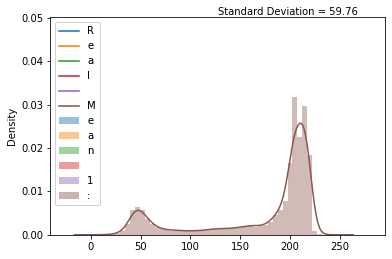

In [84]:
fig, ax = plt.subplots() # make it bigger
camera = Camera(fig)# the camera gets our figure
for img in os.listdir(path):
    if(img.endswith('.jpg')):
        file =  os.path.join(basepath,img)
        img_obj = plt.imread(os.path.join(file))
        std =  img_obj.reshape(-1,1).std()
        mean = img_obj.reshape(-1,1).mean()
        A_plot = sns.distplot(img_obj.reshape(-1,1)) 
        clas =  file.split('/')[-1].split('.')[0]
        plt.legend(f'Real Mean {clas}: {mean:.2f}')
        
        ax.text(0.5, 1.01, "Standard Deviation = "+str(np.round(std,2)), transform=ax.transAxes) # making the dynamic title
        camera.snap() # camera snapshot
    
animation = camera.animate(blit=False, interval=620)
HTML(animation.to_html5_video())

In [78]:
animation.save('animation_pics.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [80]:
!ffmpeg -i animation_pics.mp4 -filter:v fps=fps=30 animation_pics.gif

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'animat